In [1]:
import os
import json
import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import math
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

C:\Users\wenqi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
num_words=1500

In [3]:
file_list = os.listdir('data')
text=[]
sentiment=[]
for file in file_list:
    with open('data/'+file,'r') as f:
        d = json.load(f)
        text.extend(d['text'].values())
        sentiment.extend(d['sentiment'].values())
X=text
Y=sentiment

In [4]:
X=[]
Y=[]
for i in range(len(sentiment)):
    if sentiment[i]!='neutral':
        X.append(text[i])
        Y.append(1 if sentiment[i]=='positive' else 0)

In [5]:
train_x=[]
train_y=[]#mark 1 as positive 0 as negative

In [6]:

file_list = os.listdir('aclImdb/train/pos')
for file in file_list:
    with open('aclImdb/train/pos/'+file,'rb') as f:
        s = f.read().decode('utf8')
        train_x.append(s)
pos_num=len(train_x)
train_y.extend([1]*pos_num)



In [7]:
file_list = os.listdir('aclImdb/train/neg')
for file in file_list:
    with open('aclImdb/train/neg/'+file,'rb') as f:
        s = f.read().decode('utf8')
        train_x.append(s)
neg_num=len(train_x)-pos_num
train_y.extend([0]*neg_num)
        

In [8]:
tokenizer = Tokenizer(num_words=num_words)

In [9]:
tokenizer.fit_on_texts(train_x)

x_train = tokenizer.texts_to_matrix(train_x)
x_test = tokenizer.texts_to_matrix(X)
y_train = train_y
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 88582 unique tokens.


In [17]:
y_test=Y

In [18]:
ber=BernoulliNB()
ber.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [19]:
y_pred = ber.predict(x_test)
print("Score for train: "+str(ber.score(x_train,y_train)))
print("Score: "+str(ber.score(x_test,y_test)))

Score for train: 0.83444
Score: 0.8258575197889182


In [20]:
confusion_matrix(y_test,y_pred,labels=[1,0])

array([[311,   6],
       [ 60,   2]], dtype=int64)

Accuracy Score:  0.8258575197889182
Predicted  False  True  __all__
Actual                         
False          2    60       62
True           6   311      317
__all__        8   371      379


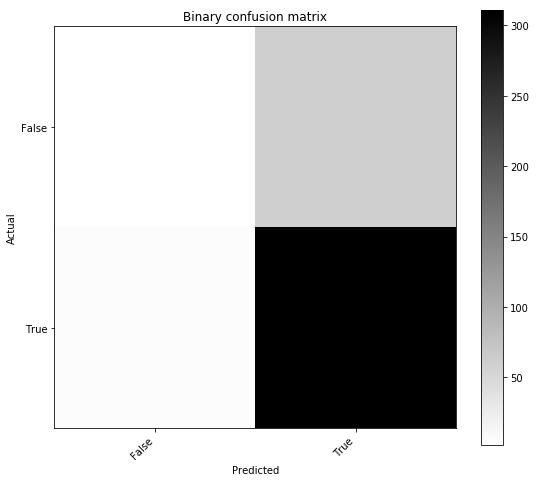

In [22]:
cnf_matrix = ConfusionMatrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)


print('Accuracy Score: ', acc_score)

print(cnf_matrix)

cnf_matrix.plot()
plt.show()